In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as wb
from dateutil.relativedelta import relativedelta
import datetime
import seaborn as sns
sns.set()

Investment growth in S&P 500 in 30 years when selling the shares

In [2]:
investment_growth = pd.read_csv("D:/Data Science practice/Blog/Beginner's guide Series/Tax/S&P dividend return dataframe2.csv")

del investment_growth["Unnamed: 0"]

investment_growth

,Start Date,End Date,EOY Stock Price ($),Annual Return (%),Total Investment ($)
0,1990-01-01,1990-12-31,330.22,-7.32,5560.80
1,1991-01-01,1991-12-31,417.09,25.63,14523.83
2,1992-01-01,1992-12-31,435.71,4.82,21513.08
3,1993-01-01,1993-12-31,466.45,7.29,29518.78
4,1994-01-01,1994-12-31,459.27,-0.85,35216.87
5,1995-01-01,1995-12-31,615.93,29.82,53507.74
6,1996-01-01,1996-12-31,740.74,18.45,70486.92
7,1997-01-01,1997-12-31,970.43,29.29,98889.94
8,1998-01-01,1998-12-31,1229.23,25.33,131458.56
9,1999-01-01,1999-12-31,1469.25,19.64,164455.42


**Calculating Capital Grains Tax - Assume an annual salary of £30,000 and we sell the sales at once in 30 years**
* Deduct cost of buying
* Deduct capital gains tax excempt amount - £12,300
* Basic rate - 10%
* Higher rate - 20%

In [3]:
#ignore exchange rates
income = 30000
personal_allowance = 12570
capitalgain_allowance = 12300
buying_cost = 180000

investment_df = investment_growth[["Total Investment ($)"]]

investment_df

,Total Investment ($)
0,5560.80
1,14523.83
2,21513.08
3,29518.78
4,35216.87
5,53507.74
6,70486.92
7,98889.94
8,131458.56
9,164455.42


In [4]:
total_gain = float(investment_df.iloc[30])
taxable_gain = total_gain - buying_cost - capitalgain_allowance
taxable_income = income - personal_allowance

#if salary is constant - £30,000
income_tax = round(taxable_income * 0.2, 2)
gain_basicrate = round((50270 - 12571 - taxable_income) * 0.1, 2)
gain_higherrate = round((taxable_gain - gain_basicrate) * 0.2, 2)

capitalgain_tax = gain_basicrate + gain_higherrate
total_tax = income_tax + gain_basicrate + gain_higherrate

total_tax

117370.57999999999

**Calculating Income Tax if additional income earned as salary** 

In [5]:
total_income = income + total_gain
taxable_income2 = total_income - personal_allowance

print(taxable_income2)
#basic rate tax
if total_income <= 50270:
    toal_tax1 = round(taxable_income2 * 0.2, 2)
    print( toal_tax1)
#higher rate
elif 50271 < total_income <= 150000:
    basic_rate = (50270 - 12571) * 0.2
    higher_rate = (taxable_income2 - (50270 - 12571)) * 0.4
    toal_tax1 = round(basic_rate + higher_rate, 2)
    print(toal_tax1)
else:
    basic_rate = (50270 - 12571) * 0.2
    higher_rate = (150000 - 50271) * 0.4
    additional_rate = round((taxable_income2 - (50270 - 12571) - (150000 - 50271)) * 0.45, 2)
    toal_tax1 = round(basic_rate + higher_rate + additional_rate, 2)
    print(toal_tax1)
    

771045.3
332559.19


Plotting stacked bar chart

In [6]:
category_lst = ["Income Tax", "Basic Rate", "Higher Rate", "Additional Rate"]
cgain_lst = [income_tax, gain_basicrate, gain_higherrate, 0]
income_tax_lst = [0, basic_rate, higher_rate, additional_rate]

tax1 = pd.DataFrame(columns = ["Category", "Capital Gain Tax", "Income Tax"])
tax1["Category"] = category_lst
tax1["Capital Gain Tax"] = cgain_lst
tax1["Income Tax"] = income_tax_lst

tax1



,Category,Capital Gain Tax,Income Tax
0,Income Tax,3486.00,0.00
1,Basic Rate,2026.90,7539.80
2,Higher Rate,111857.68,39891.60
3,Additional Rate,0.00,285127.79


In [7]:
tax1.set_index("Category", inplace = True)

tax1

,Capital Gain Tax,Income Tax
Category,,
Income Tax,3486.00,0.00
Basic Rate,2026.90,7539.80
Higher Rate,111857.68,39891.60
Additional Rate,0.00,285127.79


<Figure size 1080x576 with 0 Axes>

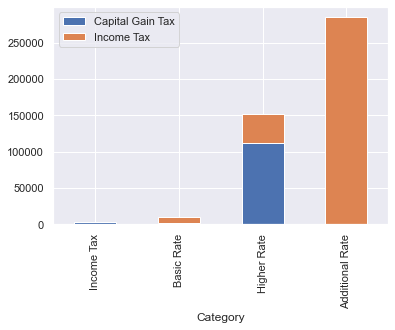

In [8]:
plt.figure(figsize = (15, 8))
tax1.plot(kind = "bar", stacked = True)

plt.show()

In [9]:
"""income_tax_lst = [round(income_tax/ total_tax * 100, 0), 0]
br_lst = [round(gain_basicrate/total_tax * 100, 0), round(basic_rate/ toal_tax1 * 100, 0)]
hr_lst = [round(gain_higherrate/total_tax * 100, 0), round(higher_rate/ toal_tax1 * 100, 0)]
ar_lst = [0, round(additional_rate/ toal_tax1 * 100, 0)]"""

'income_tax_lst = [round(income_tax/ total_tax * 100, 0), 0]\nbr_lst = [round(gain_basicrate/total_tax * 100, 0), round(basic_rate/ toal_tax1 * 100, 0)]\nhr_lst = [round(gain_higherrate/total_tax * 100, 0), round(higher_rate/ toal_tax1 * 100, 0)]\nar_lst = [0, round(additional_rate/ toal_tax1 * 100, 0)]'

In [10]:
income_tax_lst = [income_tax, 0]
br_lst = [gain_basicrate, basic_rate]
hr_lst = [gain_higherrate, higher_rate]
ar_lst = [0, additional_rate]

In [11]:
category_lst = ["Capital Gain Tax", "Income Tax"]


tax = pd.DataFrame(columns = ["Category", "Income Tax", "Basic Rate", "Higher Rate", "Additional Rate"])
tax["Category"] = category_lst
tax["Income Tax"] = income_tax_lst
tax["Basic Rate"] = br_lst
tax["Higher Rate"] = hr_lst
tax["Additional Rate"] = ar_lst

tax.set_index("Category", inplace = True)

tax

,Income Tax,Basic Rate,Higher Rate,Additional Rate
Category,,,,
Capital Gain Tax,3486.0,2026.9,111857.68,0.00
Income Tax,0.0,7539.8,39891.60,285127.79


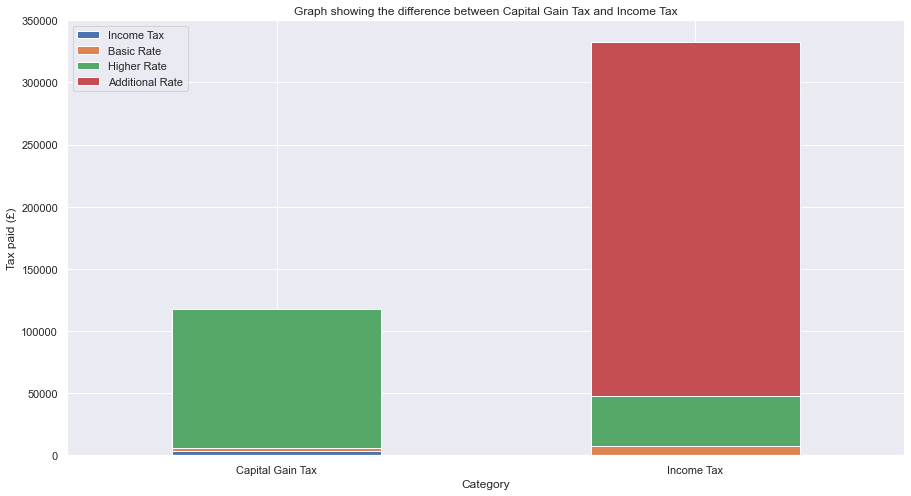

In [12]:
tax.plot(kind = "bar", stacked = True, figsize = (15, 8))
plt.xticks(rotation = 0)
plt.title("Graph showing the difference between Capital Gain Tax and Income Tax")
plt.ylabel("Tax paid (£)")
plt.ylim([0, 350000])

plt.savefig("D:/Data Science practice/Blog/Beginner's guide Series/Tax/Capital Gain Tax vs Income Tax")
plt.show()